[05/06 16:10:05.722496][info][131153531][Context.cpp:69] Context created with config: default config!
[05/06 16:10:05.722577][info][131153531][Context.cpp:74] Context work_dir=/Users/bene/Downloads
[05/06 16:10:05.722580][info][131153531][Context.cpp:77] 	- SDK version: 1.9.4
[05/06 16:10:05.722581][info][131153531][Context.cpp:78] 	- SDK stage version: main
[05/06 16:10:05.722590][info][131153531][Context.cpp:82] get config EnumerateNetDevice:false
[05/06 16:10:05.722593][info][131153531][MacPal.cpp:36] createObPal: create MacPal!
[05/06 16:10:05.723627][info][131153531][MacPal.cpp:104] Create PollingDeviceWatcher!
[05/06 16:10:05.723642][info][131153531][DeviceManager.cpp:15] Current found device(s): (0)
[05/06 16:10:05.723647][info][131153531][Pipeline.cpp:15] Try to create pipeline with default device.
[05/06 16:10:05.723650][warning][131153531][ObException.cpp:5] No device found, fail to create pipeline!
[05/06 16:10:05.724184][info][131153531][Context.cpp:90] Context destroyed


OpenCV: out device of bound (0-1): 2
OpenCV: camera failed to properly initialize!
[ WARN:0@243.193] global cap.cpp:323 open VIDEOIO(OBSENSOR): raised unknown C++ exception!




TypeError: Image data of dtype object cannot be converted to float

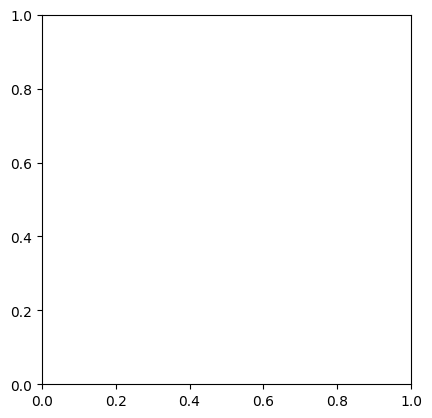

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 


# Open the default camera
cam = cv2.VideoCapture(2)

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

for i in range(20):
    ret, frame = cam.read()

plt.imshow(frame)
plt.show()

# Release the capture and writer objects
cam.release()


In [8]:
import uc2rest
import numpy as np
import time

port = "unknown"
ESP32 = uc2rest.UC2Client(serialport=port, baudrate=115200, DEBUG=True)


[OpenDevice]: Port not found
[checkFirmware]: b'++\r\n'
{"state":{"identifier_name":"UC2_Feather","identifier_id":"V2.0","identifier_date":"May  4 202515:47:17","identifier_author":"BD","IDENTIFIER_NAME":"uc2-esp","configIsSet":0,"pindef":"waveshare_esp32s3_ledarray","I2C_SLAVE":0},"qid":0}
--
Using API version 2
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
[ProcessLines]:[ 28][LeCotole.p:5]paeLCoan):arLeomnd:ctn:ff+
[ProcessLines]:id":1sue":
[ProcessLines]:22][I][LedController.cpp:351] parseLedCommand(): ParsLedommn:atofl
[ProcessLines]:[ 25230][I][LedController.cpp:351] parseLedCommand(): ParseLedCommand: action: halves
[ProcessLines]:++
[ProcessLines]:{"qid":3,"success":1}
[ProcessLines]:--
[ProcessCommands]: {'qid': 3, 'success': 1}
[ProcessLines]:++
[ProcessLines]:{"qid":4,"success":1}
[ProcessLines]:--
[ProcessCommands]: {'qid': 4, 'success': 1}
[ProcessLines]:[269[ILeonolr.1] parseLedCommand(): ParseLedCommand: action: halves
[ProcessLines]:++
[ProcessL

In [10]:
#%%
import uc2rest
import numpy as np
import time

port = "unknown"
port = "/dev/cu.usbmodem101"
ESP32 = uc2rest.UC2Client(serialport=port, baudrate=115200, DEBUG=True, skipFirmwareCheck=True)

''' TEST LED '''

# Create LedMatrix object, pass a reference to your “parent” that has post_json()
my_led_matrix = ESP32.led



for i in range(1):
    # Turn off all LEDs
    my_led_matrix.send_LEDMatrix_off()
    time.sleep(0.1)
    # Fill entire matrix with red
    my_led_matrix.send_LEDMatrix_full((255,0,0), getReturn=False)
    time.sleep(0.1)



# Open the default camera
cam = cv2.VideoCapture(0)

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# warmup camera
for i in range(20):
    ret, frame = cam.read()



mFrames = []
# Light only left half in bright white
mDirections = ["left", "right", "top", "bottom"]
for iDirection in mDirections:
    my_led_matrix.send_LEDMatrix_halves(region=iDirection, intensity=(255,255,255), getReturn=False)
    time.sleep(0.1)
    mFrames.append(cam.read()[-1])

# Draw a ring of radius 3 in purple
my_led_matrix.send_LEDMatrix_rings(radius=3, intensity=(128,0,128))

# Draw a filled circle of radius 5 in green
my_led_matrix.send_LEDMatrix_circles(radius=3, intensity=(0,255,0))




for iLED in range(5):
    # timeout = 0 means no timeout => mResult will be rubish!
    mResult = ESP32.led.send_LEDMatrix_single(indexled=iLED, intensity=(255, 255, 255), getReturn=0, timeout=0.1)
    mResult = ESP32.led.send_LEDMatrix_single(indexled=iLED, intensity=(0, 0, 0),  getReturn=0, timeout=0.1)

# display random pattern
for i in range(5):
    led_pattern = np.random.randint(0,55, (25,3))
    mResult = ESP32.led.send_LEDMatrix_array(led_pattern=led_pattern,getReturn=0,timeout=0)



# {"task":"/ledarr_act", "led":{"LEDArrMode":1, "led_array":[{"id":0, "r":255, "g":255, "b":255}]}}
mResult = ESP32.led.send_LEDMatrix_full(intensity=(255, 255, 255))
time.sleep(.1)
mResult = ESP32.led.send_LEDMatrix_full(intensity=(0, 0, 0), getReturn=False)


[OpenDevice]: Port not found
Using API version 2
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
[SendingCommands]:{"task": "/ledarr_act", "qid": 1, "led": {"action": "off"}}

[ProcessLines]:[ 17466][I][LedController.cpp:351] parseLedCommand(): ParseLedCommand: action: off
[ProcessLines]:++
[ProcessLines]:{"qid":1,"success":1}
[ProcessLines]:--
[ProcessCommands]: {'qid': 1, 'success': 1}
[SendingCommands]:{"task": "/ledarr_act", "qid": 2, "led": {"action": "fill", "LEDArrMode": 1, "r": 255, "g": 0, "b": 0}}

[ProcessLines]:[ 17734][I][LedController.cpp:341] parseLedCommand(): parseLedCommand: LEDArrMode: 1
[ProcessLines]:[ 17742][I][LedController.cpp:351] parseLedCommand(): ParseLedCommand: action: fill
[ProcessLines]:++
[ProcessLines]:{"qid":2,"success":1}
[ProcessLines]:--
[ProcessCommands]: {'qid': 2, 'success': 1}
[SendingCommands]:{"task": "/ledarr_act", "qid": 3, "led": {"action": "halves", "region": "left", "r": 255, "g": 255, "b": 255}}

[ProcessLines]:[ 

In [22]:
import sys
sys.executable 


'/Users/bene/mambaforge/envs/imswitch311/bin/python3.11'